# Customer Churn Analysis
### Created By : Eka Surachman

# Business Problem Understanding

Context

Perusahaan e-commerce beroperasi di lingkungan bisnis yang kompetitif, di mana keberhasilan sangat bergantung pada kemampuan untuk mempertahankan pelanggan. Pelanggan yang loyal cenderung memberikan kontribusi yang signifikan terhadap pendapatan melalui pembelian berulang, sedangkan pelanggan yang tidak loyal berpotensi meningkatkan churn rate dan membebani biaya akuisisi pelanggan baru. Dalam upaya untuk memaksimalkan efisiensi bisnis dan meningkatkan hubungan dengan pelanggan, perusahaan ingin memahami karakteristik pelanggan yang loyal dan tidak loyal.

Target:

0: Tidak churn

1: Churn

Problem:

Perusahaan kesulitan membedakan pelanggan yang loyal dan tidak loyal secara sistematis. Hal ini mengakibatkan ketidakefektifan strategi pemasaran dan program loyalitas karena tidak adanya data yang mendukung untuk segmentasi pelanggan. Tanpa pemahaman ini, perusahaan tidak dapat secara proaktif menangani churn atau meningkatkan pengalaman pelanggan yang lebih personal.

Goals:

Berdasarkan permasalahan di atas, perusahaan ingin memiliki kemampuan untuk prediksi churn pelanggan dan mengetahui faktor apa saja yang berpengaruh terhadap loyalitas pelanggan


Analytic Approach:

Mencari pola pada pelanggan untuk mengetahui pelanggan yang churn dan yang tidak. Kemudian pola tersebut digunakan untuk membangun model prediksi loyalibilitas pelanggan.

Evaluation Metric:

PR AUC (Precision-Recall Area Under Curve) adalah metrik evaluasi yang digunakan untuk mengukur kinerja model klasifikasi, khususnya dalam konteks dataset yang tidak seimbang, seperti kasus prediksi churn pelanggan. PR AUC menggambarkan hubungan antara precision (ketepatan prediksi positif) dan recall (kemampuan menangkap kelas positif) pada berbagai ambang batas klasifikasi.

Ketidakseimbangan Kelas: PR AUC dirancang khusus untuk menangani dataset yang tidak seimbang dan memberikan gambaran yang lebih akurat tentang kinerja model pada kelas minoritas (pelanggan yang churn).

Fokus pada Kelas Positif: Tujuan utamanya adalah mengidentifikasi pelanggan yang kemungkinan besar akan churn. PR AUC secara langsung mengukur precision dan recall model pada kelas positif.

Konteks Bisnis: Dalam skenario churn pelanggan, seringkali lebih penting untuk mengidentifikasi calon pelanggan yang akan churn dengan benar (meskipun ada beberapa false positives) daripada memiliki akurasi keseluruhan yang tinggi. PR AUC mencerminkan prioritas ini dengan fokus pada precision dan recall.


# Data Understanding

Source: https://drive.google.com/drive/u/0/folders/1PITb78NtK9Ra6wOkQdXCIgItZkj29Ves

Attribute Information

| Attribute               | Data Type, Length | Description                                                                 |
|-------------------------|-------------------|-----------------------------------------------------------------------------|
| Tenure                  | Float            | Lamanya pelanggan menjadi pelanggan (dalam bulan).                         |
| WarehouseToHome         | Float            | Jarak antara gudang dan rumah pelanggan.        |
| NumberOfDeviceRegistered | Integer          | Jumlah perangkat yang terdaftar oleh pelanggan.                            |
| PreferedOrderCat        | Text             | Kategori pesanan yang paling sering dipesan pelanggan dalam sebulan terakhir.                     |
| SatisfactionScore       | Integer          | Skor kepuasan pelanggan (rentang 1 hingga 5).            |
| MaritalStatus           | Text             | Status pernikahan pelanggan, seperti "Single", "Married", atau "Divorced". |
| NumberOfAddress         | Integer          | Jumlah alamat yang telah didaftarkan oleh pelanggan.                       |
| Complain                | Integer          | Indikator apakah pelanggan pernah mengajukan komplain (0 = tidak, 1 = ya). |
| DaySinceLastOrder       | Float            | Jumlah hari sejak pelanggan terakhir kali melakukan pemesanan.             |
| CashbackAmount          | Float            | Total cashback yang diterima pelanggan dalam sebulan terakhir.         |
| Churn                   | Integer          | Indikator churn pelanggan (0 = tidak churn, 1 = churn).                    |


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC

import pickle

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [8]:
df['Churn'].value_counts()

,count
Churn,
0,3267
1,674


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [ ]:
# Satistika Deskriptif (Numerik)
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [ ]:
# Statistika Deskriptif (Kategorik)
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


# Data Cleaning

In [12]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[19.0, 25.0]"
1,WarehouseToHome,float64,169,4.29,33,"[13.0, 33.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[1, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Mobile, Others]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 4]"
5,MaritalStatus,object,0,0.00,3,"[Married, Single]"
6,NumberOfAddress,int64,0,0.00,14,"[5, 19]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[9.0, nan]"
9,CashbackAmount,float64,0,0.00,2335,"[170.41, 172.66]"


In [ ]:
# Missing Values
df.isna().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


<Axes: >

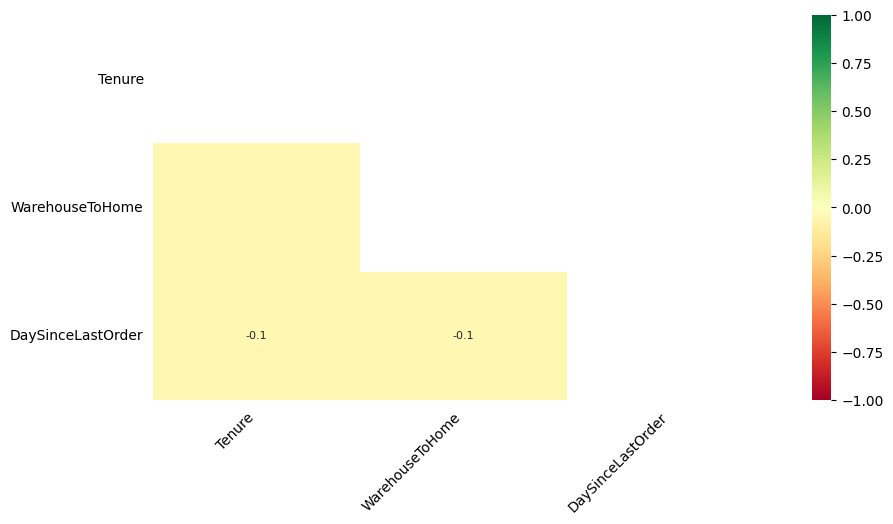

In [ ]:
# Korelasi Missing Values
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=10)

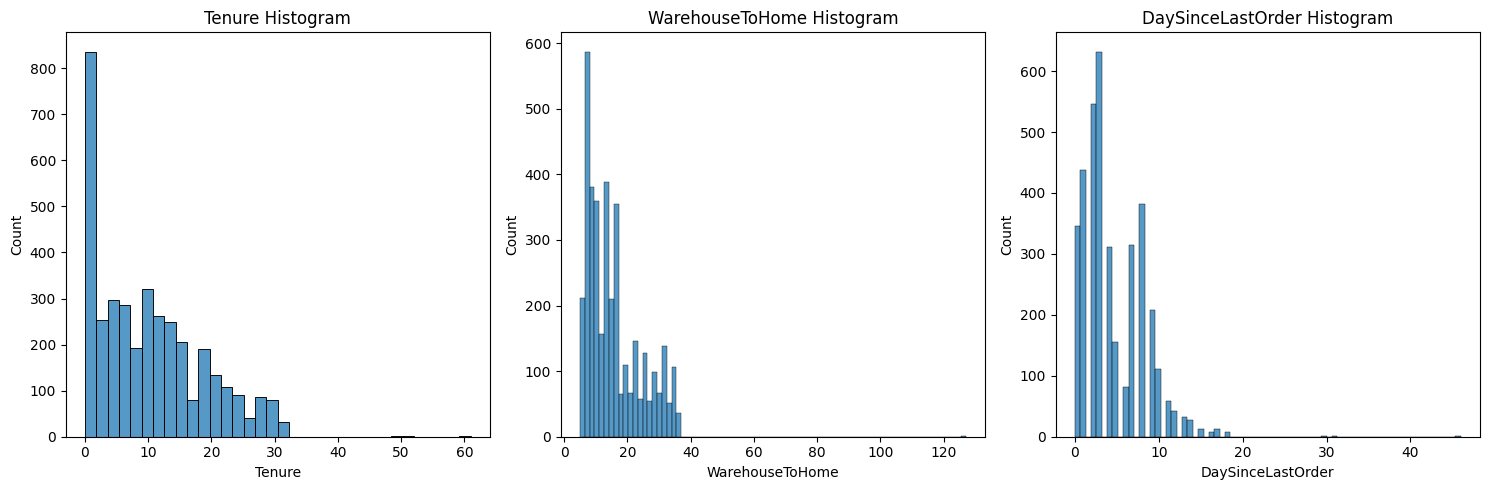

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Tenure'])
plt.title('Tenure Histogram')

plt.subplot(1, 3, 2)
sns.histplot(df['WarehouseToHome'])
plt.title('WarehouseToHome Histogram')

plt.subplot(1, 3, 3)
sns.histplot(df['DaySinceLastOrder'])
plt.title('DaySinceLastOrder Histogram')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung jumlah outlier

def count_outliers(df):
    outlier_counts = {}
    for col in df.select_dtypes(include=np.number):  # Hanya kolom numerik
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(df)
outlier_counts

{'Tenure': 4,
 'WarehouseToHome': 1,
 'NumberOfDeviceRegistered': 271,
 'SatisfactionScore': 0,
 'NumberOfAddress': 3,
 'Complain': 0,
 'DaySinceLastOrder': 43,
 'CashbackAmount': 316,
 'Churn': 674}

In [ ]:
# Menghapus Outlier
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


numerical_cols_to_clean = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
                          'SatisfactionScore', 'NumberOfAddress', 'Complain',
                          'DaySinceLastOrder', 'CashbackAmount']


for col in numerical_cols_to_clean:
    df = remove_outliers_iqr(df, col)

print(df.shape)

(2740, 11)


In [18]:
count_outliers(df)

{'Tenure': 0,
 'WarehouseToHome': 0,
 'NumberOfDeviceRegistered': 0,
 'SatisfactionScore': 0,
 'NumberOfAddress': 0,
 'Complain': 0,
 'DaySinceLastOrder': 13,
 'CashbackAmount': 148,
 'Churn': 445}

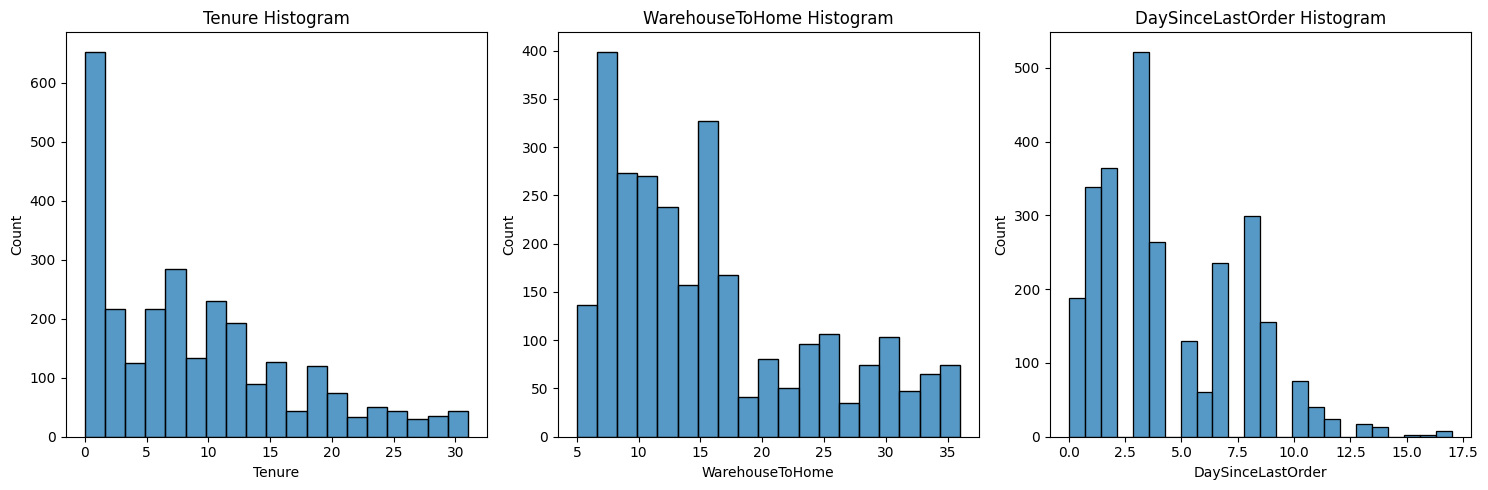

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Tenure'])
plt.title('Tenure Histogram')

plt.subplot(1, 3, 2)
sns.histplot(df['WarehouseToHome'])
plt.title('WarehouseToHome Histogram')

plt.subplot(1, 3, 3)
sns.histplot(df['DaySinceLastOrder'])
plt.title('DaySinceLastOrder Histogram')

plt.tight_layout()
plt.show()

Dikarenakan adanya skew pada ketiga kolom di atas, maka nilai missing value diisi dengan nilai median.

In [20]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [21]:
df.isna().sum()

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0


# Data Analysis

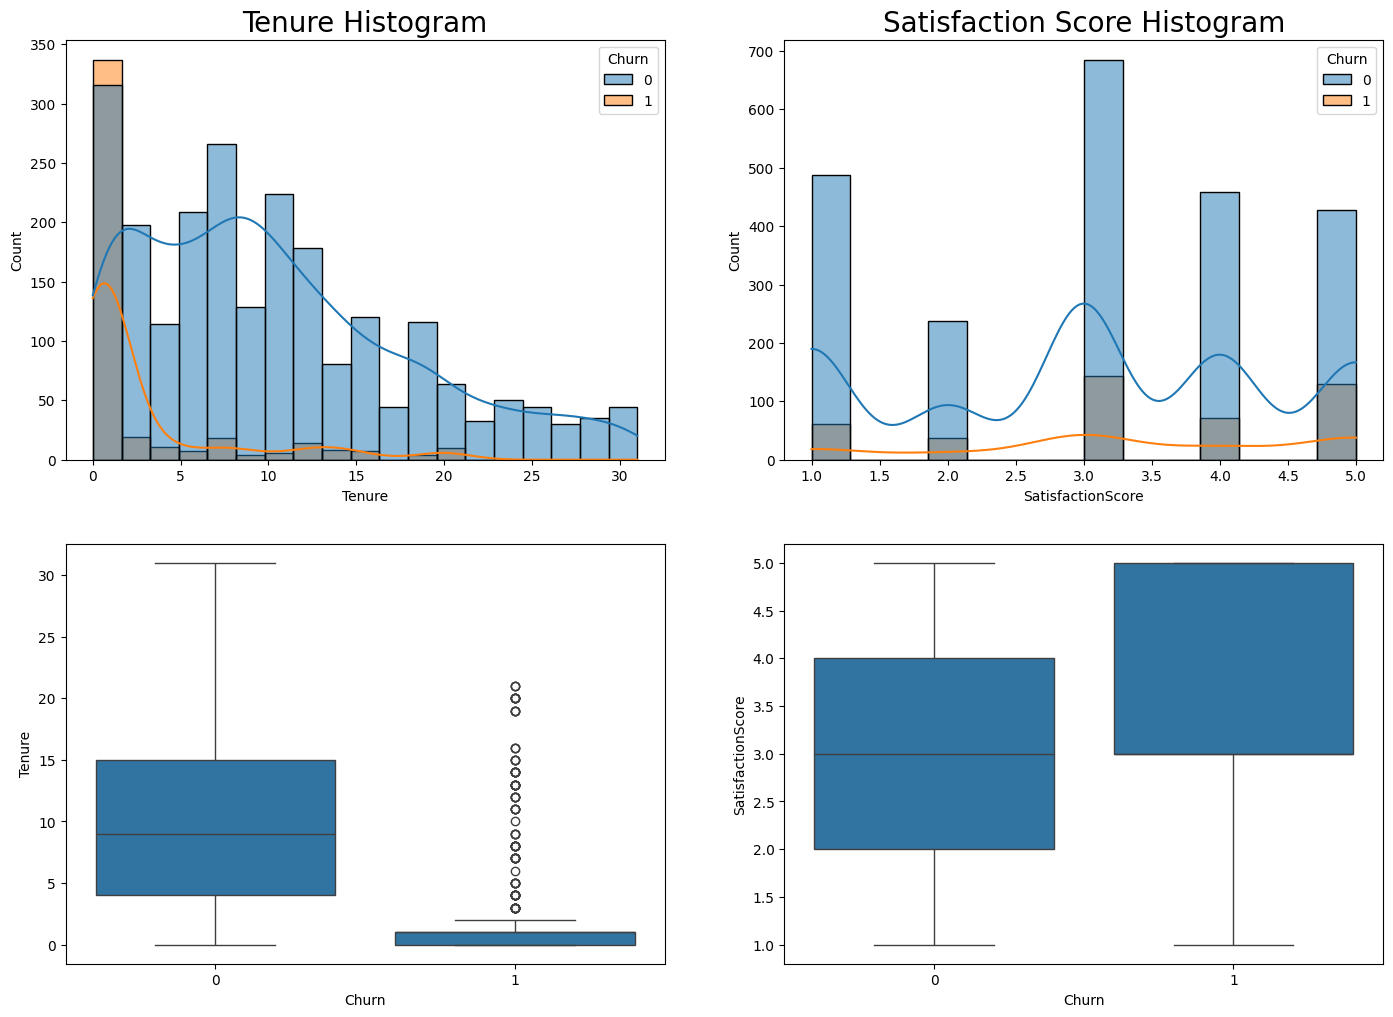

In [22]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='SatisfactionScore',hue='Churn',kde=True)
plt.title('Satisfaction Score Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='Tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='SatisfactionScore', x='Churn')
plt.show()

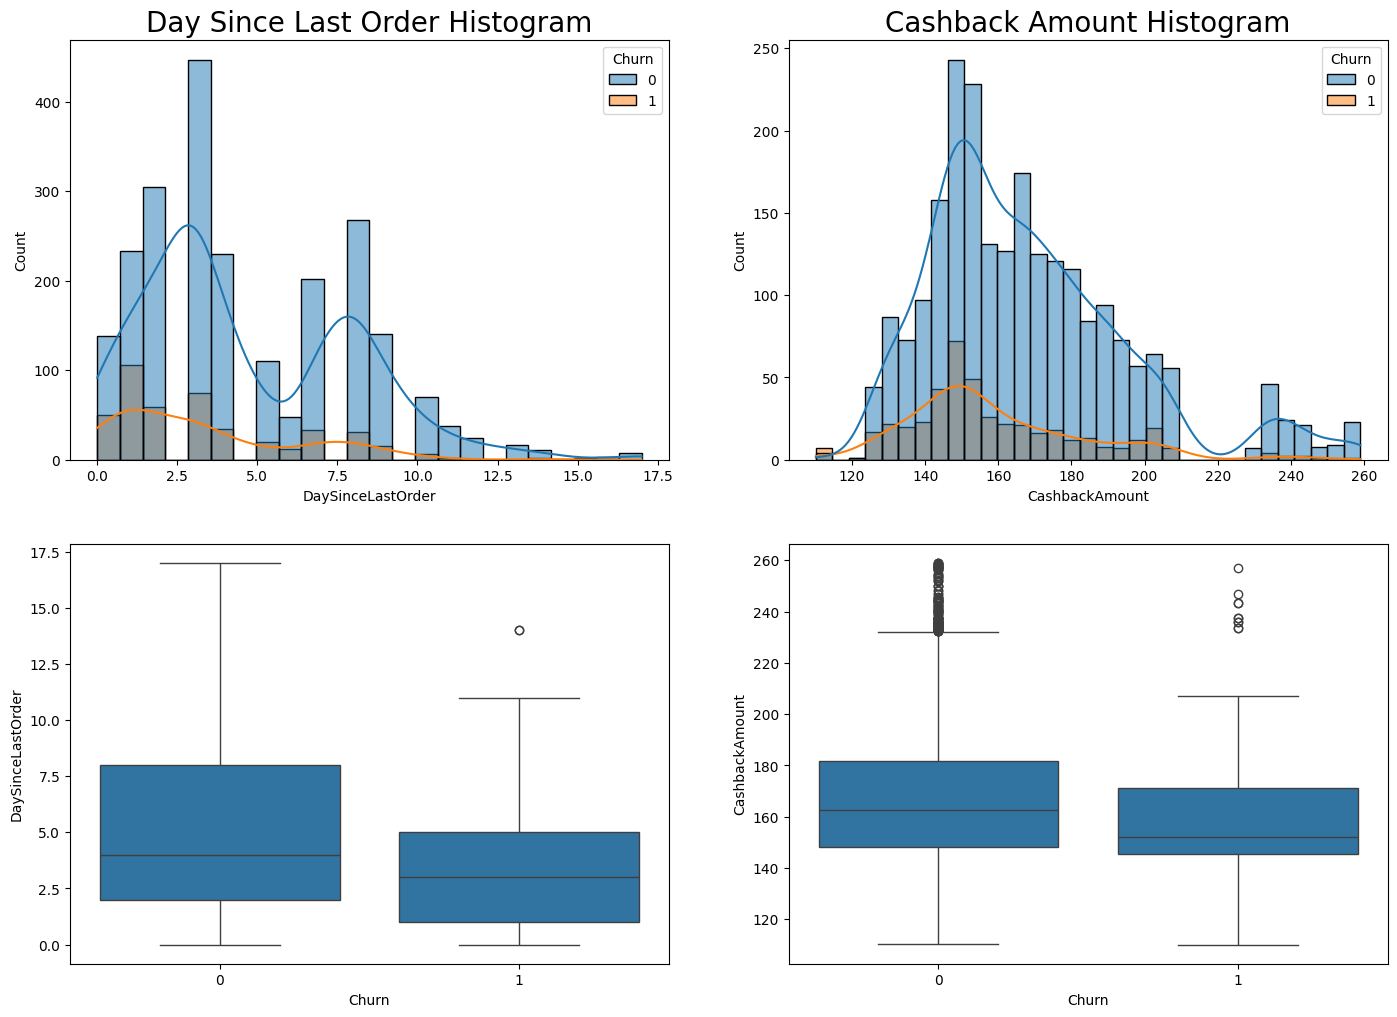

In [23]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='DaySinceLastOrder',hue='Churn',kde=True)
plt.title('Day Since Last Order Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='CashbackAmount',hue='Churn',kde=True)
plt.title('Cashback Amount Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='DaySinceLastOrder', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='CashbackAmount', x='Churn')
plt.show()

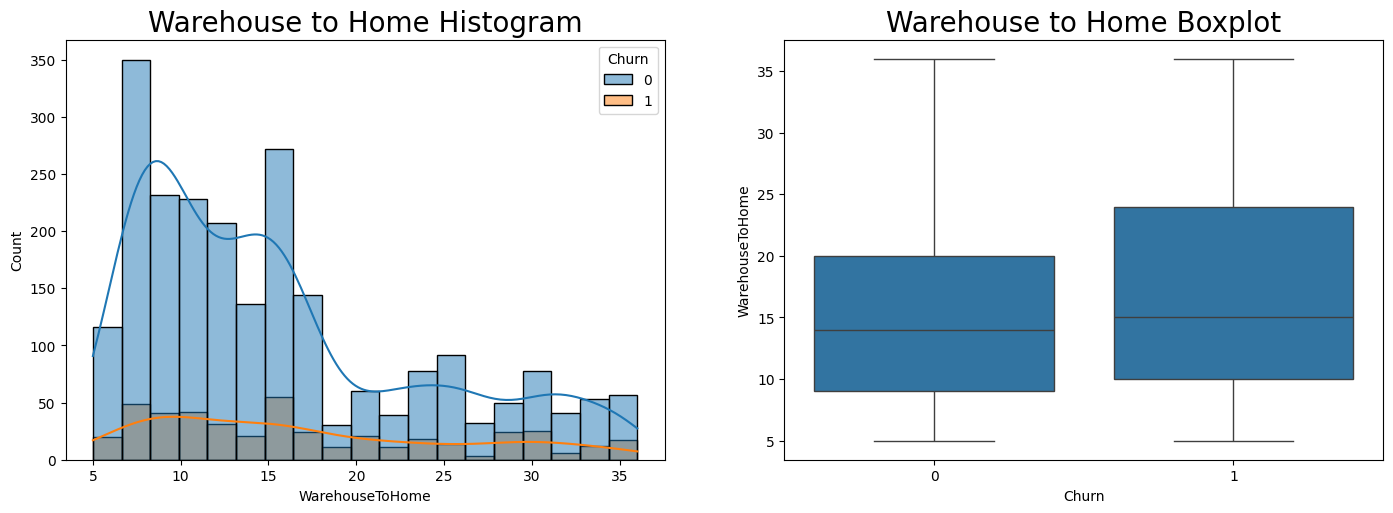

In [24]:
plt.figure(figsize=(17,12))
plt.subplot(221)
sns.histplot(data=df,x='WarehouseToHome',hue='Churn',kde=True)
plt.title('Warehouse to Home Histogram',fontsize=20)
plt.subplot(222)
sns.boxplot(data=df,y='WarehouseToHome', x='Churn')
plt.title('Warehouse to Home Boxplot',fontsize=20)
plt.show()

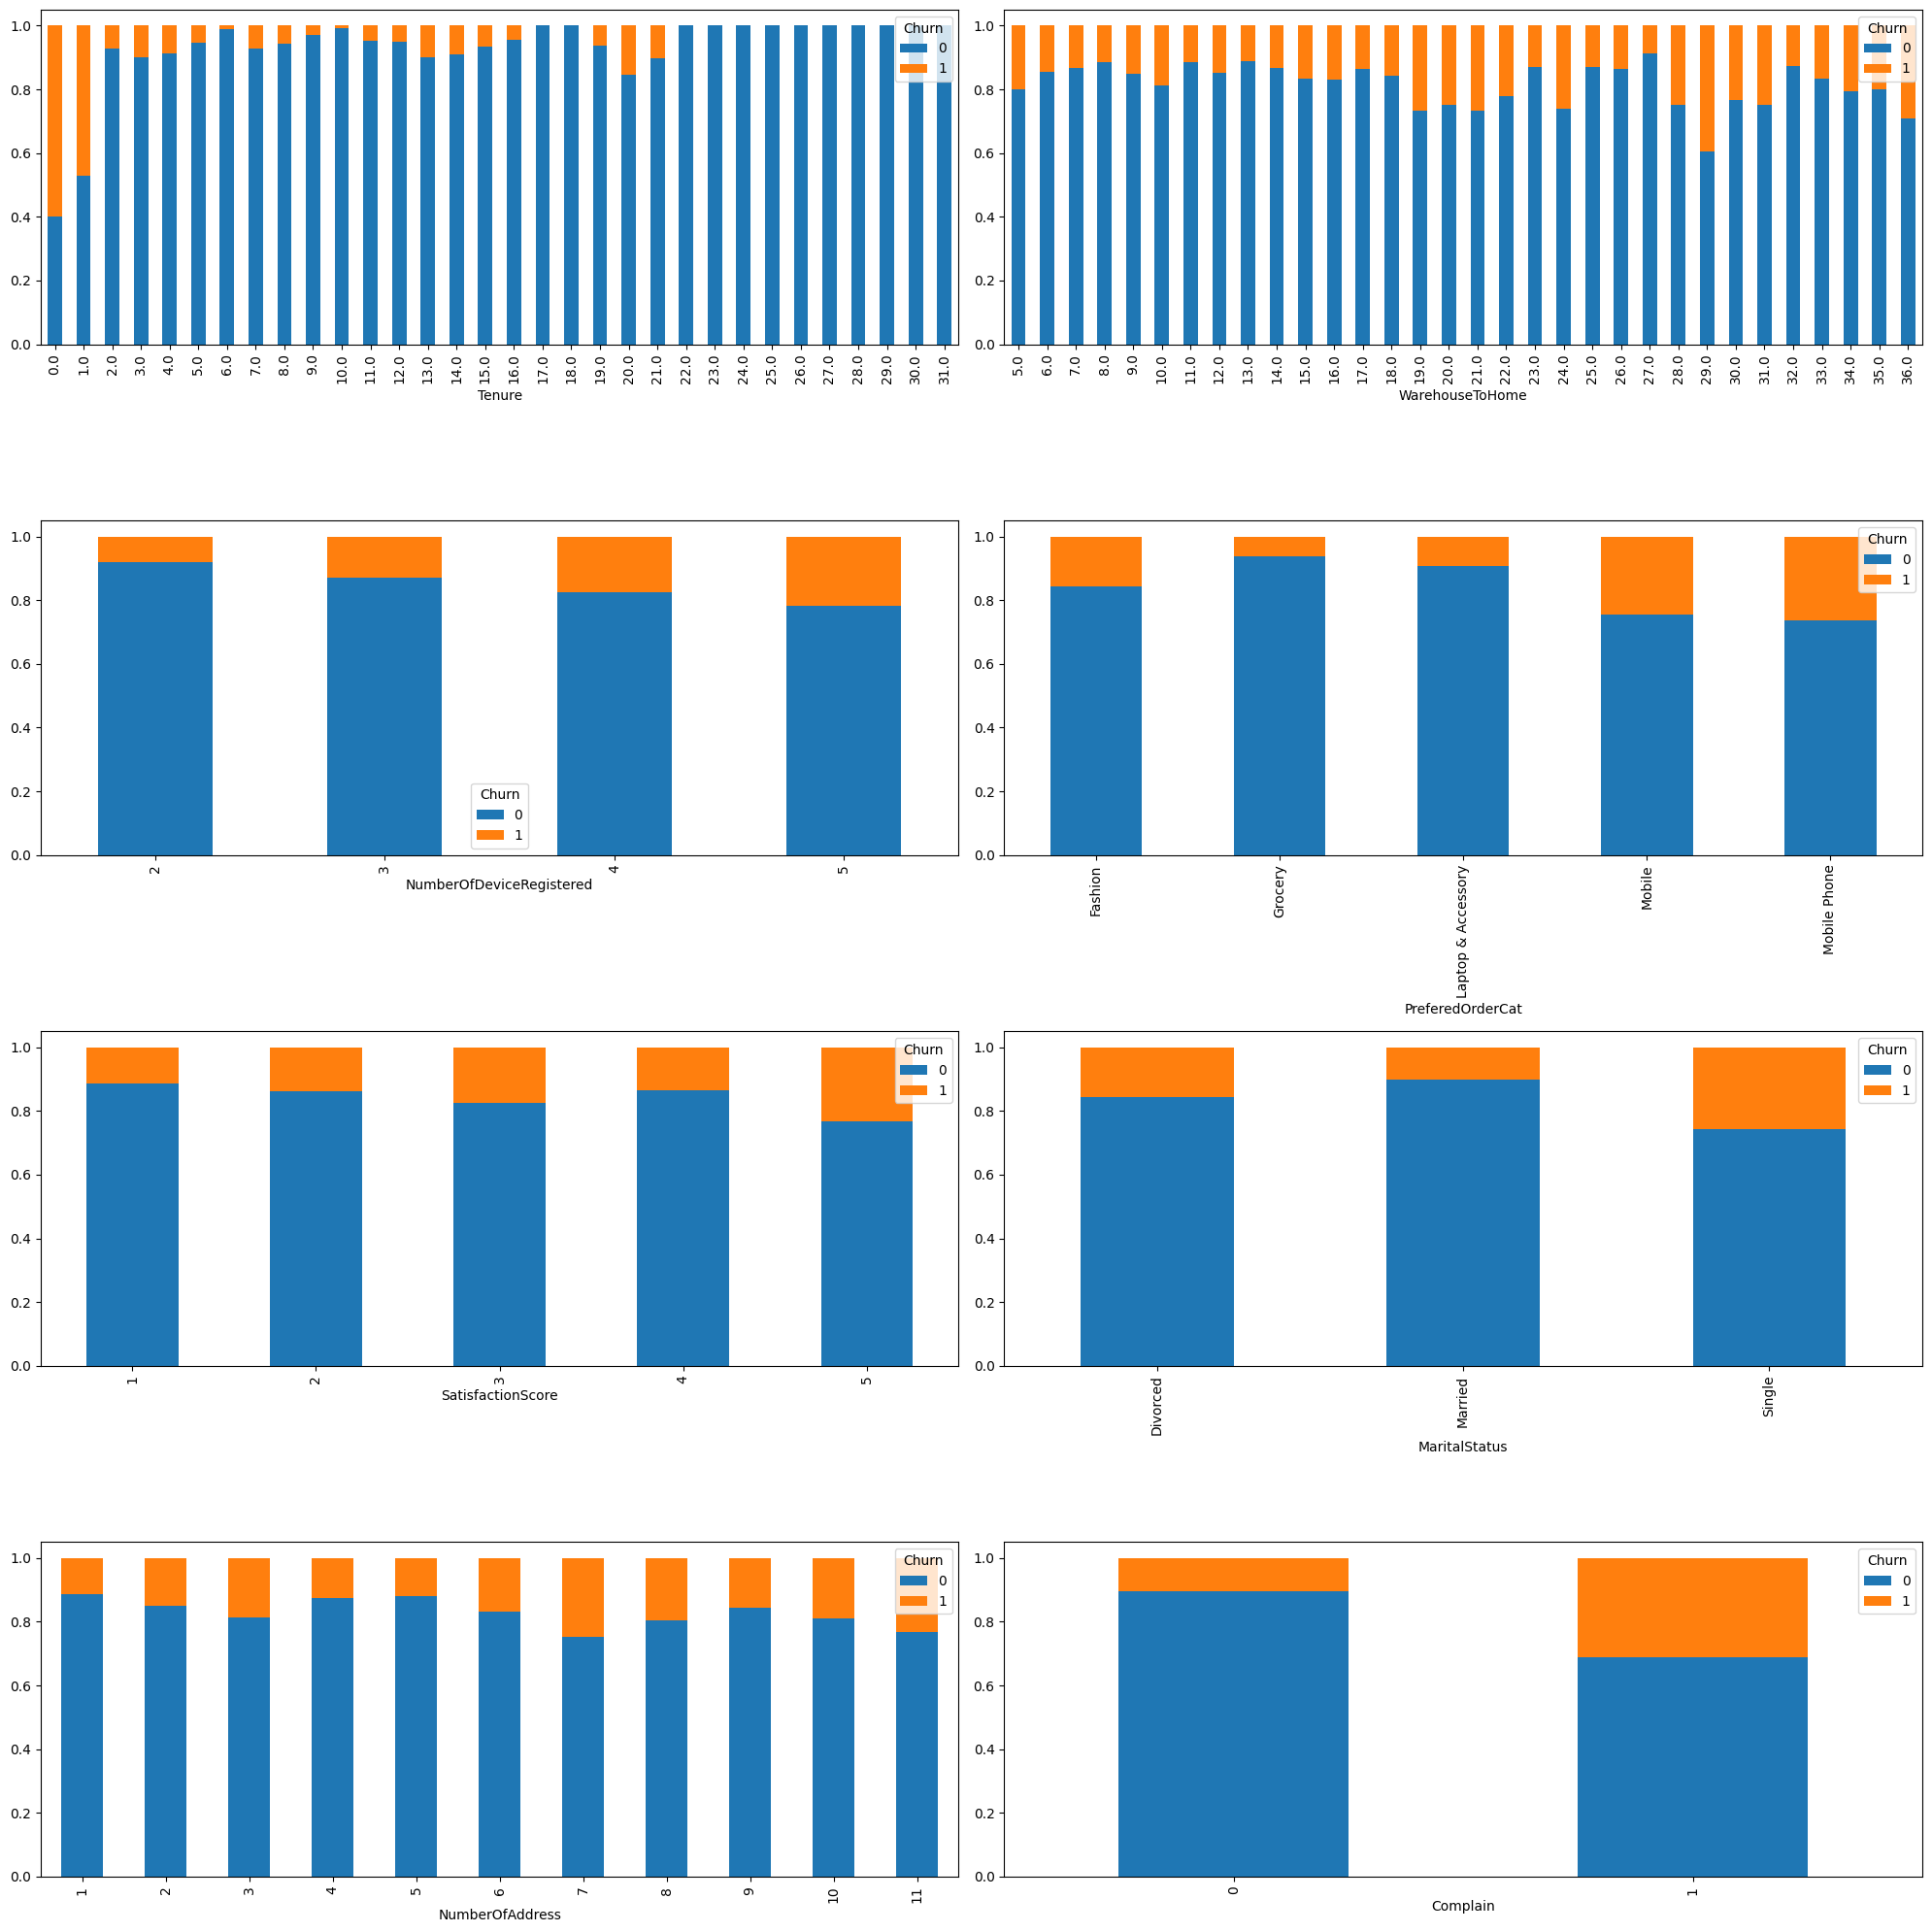

In [25]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn']).columns:
    count +=1
    if count > 8:
        break
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [26]:
for i in df.drop(columns=['Churn']).columns:
    relevent_experience_df = df.groupby(i)['Churn'].value_counts().unstack()
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False))

Churn,0,1
Tenure,,
1.0,222.0,197.0
0.0,94.0,140.0
3.0,107.0,12.0
4.0,114.0,11.0
7.0,117.0,9.0
8.0,149.0,9.0
13.0,82.0,9.0
14.0,81.0,8.0
2.0,91.0,7.0


Churn,0,1
WarehouseToHome,,
9.0,232,41
16.0,137,28
10.0,120,28
15.0,135,27
7.0,163,25
8.0,187,24
14.0,136,21
6.0,112,19
12.0,103,18


Churn,0,1
NumberOfDeviceRegistered,,
4,1065,224
3,718,106
5,364,102
2,148,13


Churn,0,1
PreferedOrderCat,,
Mobile Phone,582,209
Laptop & Accessory,1174,120
Fashion,321,60
Mobile,159,52
Grocery,59,4


Churn,0,1
SatisfactionScore,,
3,685,144
5,427,129
4,459,72
1,487,62
2,237,38


Churn,0,1
MaritalStatus,,
Single,693,238
Married,1267,145
Divorced,335,62


Churn,0,1
NumberOfAddress,,
3,571,130
2,539,94
4,239,34
6,154,31
5,212,29
7,85,28
8,112,27
10,90,21
1,148,19


Churn,0,1
Complain,,
1,536,241
0,1759,204


Churn,0,1
DaySinceLastOrder,,
1.0,233.0,106.0
3.0,447.0,75.0
2.0,305.0,59.0
0.0,138.0,50.0
4.0,230.0,34.0
7.0,202.0,33.0
8.0,268.0,31.0
5.0,110.0,20.0
9.0,141.0,15.0


Churn,0,1
CashbackAmount,,
148.62,NaN,3.0
149.04,2.0,3.0
163.80,NaN,2.0
167.35,NaN,2.0
181.17,NaN,2.0
...,...,...
258.20,1.0,NaN
258.41,1.0,NaN
258.48,2.0,NaN


# Data Preparation

Feature Engineering

In [27]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

Kolom PreferedOrderCat dan MaritalStatus diubah menggunakan OneHotEncoder karena bentuknya string atau kategorik dan kategorinya tidak banyak sehingga perlu diubah menjadi numerik agar dapat diproses untuk pembuatan model.

In [28]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)


In [30]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile,onehot__PreferedOrderCat_Mobile Phone,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__DaySinceLastOrder,remainder__CashbackAmount
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,32.0,4.0,2.0,3.0,1.0,2.0,152.95
1,0.0,1.0,0.0,0.0,1.0,0.0,6.0,10.0,4.0,5.0,3.0,0.0,4.0,192.25
2,0.0,1.0,0.0,0.0,1.0,0.0,3.0,17.0,5.0,4.0,3.0,1.0,8.0,207.68
3,0.0,1.0,0.0,0.0,0.0,1.0,12.0,9.0,2.0,5.0,8.0,1.0,13.0,184.80
4,0.0,1.0,0.0,0.0,0.0,1.0,12.0,23.0,4.0,4.0,4.0,0.0,3.0,166.98


# Model & Evaluation

In [31]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

Model Bechmarking: K-Fold

In [32]:
models = [logreg, knn, dt, rf, xgb, lgbm]
score=[]
mean=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='average_precision')
    score.append(model_cv)
    mean.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean pr_auc':mean,'sdev':std}).set_index('model').sort_values(by='mean pr_auc',ascending=False)

[LightGBM] [Info] Number of positive: 284, number of negative: 1469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 1753, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.162008 -> initscore=-1.643363
[LightGBM] [Info] Start training from score -1.643363
[LightGBM] [Info] Number of positive: 285, number of negative: 1468
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 1753, number of used features: 14
[LightGBM] [Info] [binary:Bo

,mean pr_auc,sdev
model,,
Random Forest,0.836762,0.062181
LightGBM,0.831160,0.046123
XGBoost,0.827602,0.052550
Logistic Regression,0.672740,0.077244
Decision Tree,0.550892,0.085528
KNN,0.464177,0.065283


Model Benchmarking: Test Data

In [33]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_pr_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_pr_auc.append(average_precision_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'pr_auc score':score_pr_auc}).set_index('model').sort_values(by='pr_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       459
           1       0.72      0.47      0.57        89

    accuracy                           0.89       548
   macro avg       0.81      0.72      0.75       548
weighted avg       0.87      0.89      0.87       548

KNN 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       459
           1       0.62      0.42      0.50        89

    accuracy                           0.86       548
   macro avg       0.76      0.68      0.71       548
weighted avg       0.85      0.86      0.85       548

Decision Tree 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       459
           1       0.70      0.82      0.76        89

    accuracy                           0.91       548
   macro avg       0.83      0.88      0.85       548
weighted avg       0.92      0

,pr_auc score
model,
Random Forest,0.923104
XGBoost,0.909723
LightGBM,0.909297
Logistic Regression,0.667303
Decision Tree,0.604932
KNN,0.511337


# Test Oversampling with K-Fold Cross Validation

In [34]:
def calc_train_error(X_train, y_train, model):

    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    pr_auc = average_precision_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return {
        'report': report,
        'f1' : f1,
        'pr': pr_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_validation_error(X_test, y_test, model):

    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    pr_auc = average_precision_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return {
        'report': report,
        'f1' : f1,
        'pr': pr_auc,
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error


In [35]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)

In [36]:
data = x_train
target = y_train

In [37]:
categorical_features = [
    x_train.columns.get_loc(col) for col in ['PreferedOrderCat', 'MaritalStatus']
    if col in x_train.columns
]

train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]

    # Oversampling menggunnakan SMOTENC
    smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
    X_smotenc, Y_smotenc = smote_nc.fit_resample(X_train, Y_train)


    # instantiate model
    rf = RandomForestClassifier(n_estimators=100,
    max_depth=10,  # Limit tree depth
    min_samples_split=5,  # Increase min samples for split
    min_samples_leaf=2)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',rf)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_smotenc, Y_smotenc, X_val, Y_val, estimator)

    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)

    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

# Evaluation Metrics Without Oversampling

In [38]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['pr'],val['pr'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train PR AUC',
                            'Test PR AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train PR AUC,Test PR AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.966531,0.936364,0.978927,0.872071,0.933294,0.872008,0.803125,0.694444,0.988462,0.892857
1,0.962982,0.877273,0.974981,0.752030,0.926324,0.749905,0.793750,0.500000,0.973180,0.666667
2,0.967562,0.885845,0.975490,0.752073,0.935869,0.761925,0.815625,0.500000,0.981203,0.720000
3,0.966548,0.904110,0.973015,0.754908,0.934235,0.814982,0.818750,0.638889,0.970370,0.741935
4,0.969083,0.936073,0.976190,0.854442,0.938961,0.864815,0.821875,0.638889,0.985019,0.958333
5,0.966548,0.931507,0.978355,0.847298,0.933489,0.853092,0.806250,0.611111,0.984733,0.956522
6,0.967055,0.917808,0.976060,0.819331,0.934590,0.809896,0.806854,0.514286,0.988550,0.947368
7,0.966548,0.894977,0.980908,0.776269,0.933489,0.786794,0.803738,0.571429,0.988506,0.714286
8,0.964521,0.904110,0.977894,0.814880,0.929257,0.805333,0.794393,0.600000,0.984556,0.750000
9,0.966548,0.936073,0.976479,0.893572,0.934050,0.860889,0.813084,0.628571,0.977528,0.956522


# Evaluation Metrics With Oversampling

In [39]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['pr'],val['pr'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))

dfEvaluate = pd.DataFrame(listItem,
                    columns=['Train Accuracy',
                            'Test Accuracy',
                            'Train PR AUC',
                            'Test PR AUC',
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train PR AUC,Test PR AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.957627,0.918182,0.993225,0.788283,0.957627,0.865104,0.960654,0.888889,0.954874,0.695652
1,0.956719,0.895455,0.993391,0.766773,0.956717,0.818969,0.963680,0.750000,0.950448,0.658537
2,0.962190,0.885845,0.993230,0.665772,0.962188,0.798898,0.969752,0.694444,0.955304,0.641026
3,0.967030,0.863014,0.994192,0.587670,0.967028,0.770601,0.974592,0.694444,0.960072,0.568182
4,0.966425,0.917808,0.993822,0.737552,0.966422,0.853653,0.975197,0.777778,0.958383,0.736842
5,0.963400,0.908676,0.994231,0.823793,0.963394,0.847067,0.975802,0.833333,0.952184,0.681818
6,0.963680,0.881279,0.993313,0.760261,0.963678,0.788610,0.970944,0.685714,0.957041,0.615385
7,0.963075,0.894977,0.992798,0.628205,0.963073,0.825812,0.970339,0.828571,0.956444,0.630435
8,0.962167,0.872146,0.993399,0.661949,0.962163,0.781624,0.972155,0.714286,0.953116,0.581395
9,0.960048,0.890411,0.993689,0.824707,0.960044,0.800546,0.970944,0.685714,0.950237,0.648649


Setelah oversampling, nilai PR AUC dan recall semakin tinggi dibanding yang tidak menggunakan oversampling. Namun, nilai precision turun tetapi tidak turun secara signifikan sehingga secara keseluruhan evaluation metrics lebih baik menggunakan data yang telah melalui proses oversampling.

# Classification Reports Without Oversampling

In [40]:
for rep in validation_errors_without_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       184
           1       0.89      0.69      0.78        36

    accuracy                           0.94       220
   macro avg       0.92      0.84      0.87       220
weighted avg       0.93      0.94      0.93       220

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       184
           1       0.67      0.50      0.57        36

    accuracy                           0.88       220
   macro avg       0.79      0.73      0.75       220
weighted avg       0.87      0.88      0.87       220

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       183
           1       0.72      0.50      0.59        36

    accuracy                           0.89       219
   macro avg       0.81      0.73      0.76       219
weighted avg       0.88      0.89      0.88       219

              preci

# Classification Reports With Oversampling

In [41]:
for rep in validation_errors_with_oversampling :
    print(rep['report'])

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       184
           1       0.70      0.89      0.78        36

    accuracy                           0.92       220
   macro avg       0.84      0.91      0.87       220
weighted avg       0.93      0.92      0.92       220

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       184
           1       0.66      0.75      0.70        36

    accuracy                           0.90       220
   macro avg       0.80      0.84      0.82       220
weighted avg       0.90      0.90      0.90       220

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       183
           1       0.64      0.69      0.67        36

    accuracy                           0.89       219
   macro avg       0.79      0.81      0.80       219
weighted avg       0.89      0.89      0.89       219

              preci

Pada kedua report di atas, nilai precision dan recall lebih tinggi pada model yang menggunakan oversampling, sehingga pada proses kali ini, model yang akan digunakan adalah model dengan oversampling.

# Hyperparameter Tuning

In [42]:
rf = RandomForestClassifier()

estimator = Pipeline([
    ('oversampling', SMOTENC(categorical_features=categorical_features, random_state=42)),
    ('preprocess', transformer),
    ('model', rf)
])

In [43]:
param_grid = {
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],     # Maximum depth of the trees
    'model__min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'model__max_features': ['sqrt', 'log2'] # Number of features to consider at each split
}

In [44]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=param_grid, scoring='average_precision', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))

In [45]:
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.8255232135403576
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [46]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('oversampling',
                 SMOTENC(categorical_features=[3, 5], random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', RandomForestClassifier(n_estimators=200))])

In [47]:
estimator=Pipeline([
    ('oversampling', SMOTENC(categorical_features=categorical_features, random_state=42)),
    ('preprocess',transformer),
    ('model',rf)
])
estimator.fit(x_train, y_train)

Pipeline(steps=[('oversampling',
                 SMOTENC(categorical_features=[3, 5], random_state=42)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', RandomForestClassifier())])

Menyimpan Model Ke Dalam Pickle

In [ ]:
with open('Eka_BestModel_Modul3.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [53]:
y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

pr_auc_default = average_precision_score(y_test, y_pred_proba_default[:,1])
pr_auc_tuned = average_precision_score(y_test, y_pred_proba_tuned[:,1])

print('PR AUC Score Default Random Forest : ', pr_auc_default)
print('PR AUC Score Tuned Random Forest : ', pr_auc_tuned)

PR AUC Score Default Random Forest :  0.861632696315978
PR AUC Score Tuned Random Forest :  0.8652889536643261


In [50]:
accuracy_score_default = accuracy_score(y_test, y_pred_default)
accuracy_score_tuned = accuracy_score(y_test, y_pred_tuned)
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Accuracy Score Default Random Forest : ', accuracy_score_default)
print('Accuracy Score Tuned Random Forest : ', accuracy_score_tuned)
print('Classification Report Default Random Forest : \n', report_default)
print('Classification Report Tuned Random Forest : \n', report_tuned)

Accuracy Score Default Random Forest :  0.9288321167883211
Accuracy Score Tuned Random Forest :  0.927007299270073
Classification Report Default Random Forest : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       459
           1       0.78      0.79      0.78        89

    accuracy                           0.93       548
   macro avg       0.87      0.87      0.87       548
weighted avg       0.93      0.93      0.93       548

Classification Report Tuned Random Forest : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       459
           1       0.78      0.76      0.77        89

    accuracy                           0.93       548
   macro avg       0.87      0.86      0.86       548
weighted avg       0.93      0.93      0.93       548



# Feature Importance

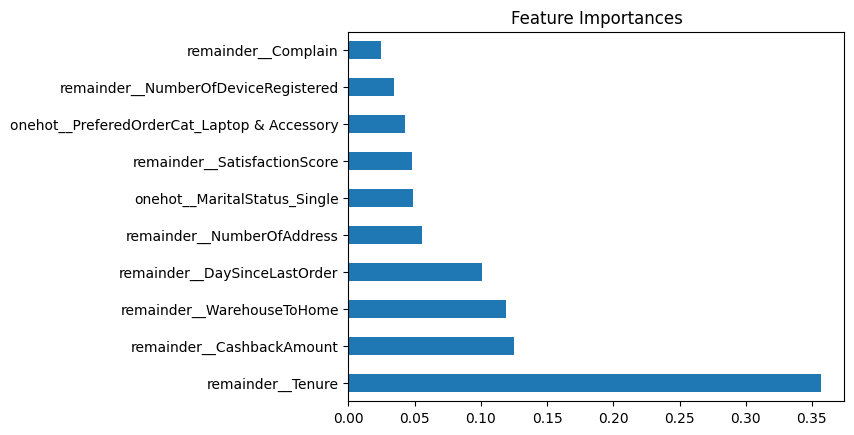

In [51]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

# Conclusion & Recommendation

In [52]:
print('Accuarcy Score Final : ', accuracy_score_tuned)
print('PR AUC Score Final Random Forest : ', pr_auc_tuned)
print('Classification Report Final Random Forest : \n', report_tuned)

Accuarcy Score Final :  0.927007299270073
PR AUC Score Final Random Forest :  0.8652889536643261
Classification Report Final Random Forest : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       459
           1       0.78      0.76      0.77        89

    accuracy                           0.93       548
   macro avg       0.87      0.86      0.86       548
weighted avg       0.93      0.93      0.93       548



### **Penjelasan Hasil Model**
1. **Accuracy (92.88%)**:
   - Model memiliki akurasi yang tinggi, menunjukkan bahwa sebagian besar prediksi untuk kelas churn (1) dan tidak churn (0) adalah benar.

2. **Precision dan Recall untuk Kelas Churn**:
   - **Precision (78%)**: Dari pelanggan yang diprediksi churn, 78% benar-benar churn. Ini menunjukkan bahwa ada false positives (pelanggan yang diprediksi churn tetapi sebenarnya tidak).
   - **Recall (76%)**: Dari seluruh pelanggan yang benar-benar churn, model berhasil mendeteksi 76%. Artinya, ada false negatives (pelanggan churn yang tidak terdeteksi).

3. **PR AUC (86.53%)**:
   - PR AUC menunjukkan keseimbangan precision dan recall. Dengan skor mendekati 87%, model cukup handal dalam menangkap pelanggan churn meskipun dataset tidak seimbang.

4. **F1-Score untuk Kelas Churn (77%)**:
   - Kombinasi precision dan recall menunjukkan bahwa model cukup konsisten dalam memprediksi churn.

---

### **Implikasi Bisnis**
Berdasarkan hasil di atas, model dapat digunakan untuk membantu perusahaan mengurangi churn pelanggan dengan beberapa implikasi bisnis berikut:

#### **1. Fokus Retensi pada Pelanggan Berisiko Churn**
   - Model mendeteksi pelanggan dengan kemungkinan churn (kelas 1) dengan tingkat presisi dan recall yang cukup baik.
   - **Strategi**:
     - Identifikasi pelanggan yang diprediksi akan churn.
     - Fokuskan kampanye retensi seperti pemberian diskon, penawaran eksklusif, atau komunikasi personal pada kelompok ini.

#### **2. Minimalkan False Negatives**
   - Pelanggan churn yang tidak terdeteksi (false negatives) dapat menyebabkan kehilangan pendapatan.
   - **Strategi**:
     - Lakukan analisis tambahan pada pelanggan yang sebenarnya churn namun tidak terdeteksi oleh model.
     - Tambahkan fitur data seperti keluhan pelanggan, durasi interaksi terakhir, atau pola pembelian untuk meningkatkan recall.

#### **3. Optimalkan Kampanye Retensi**
   - False positives (pelanggan yang diprediksi churn tetapi tidak churn) dapat meningkatkan biaya retensi.
   - **Strategi**:
     - Prioritaskan kampanye retensi dengan mempertimbangkan pelanggan dengan risiko churn tertinggi berdasarkan probabilitas prediksi model.
     - Uji respons kampanye untuk memvalidasi efektivitasnya.

#### **4. Evaluasi dan ROI Kampanye**
   - Hitung ROI untuk setiap kampanye berdasarkan prediksi churn, pendapatan rata-rata per pelanggan (ARPU), dan biaya retensi.
   - **Strategi**:
     - Misalnya, jika ARPU pelanggan Rp1.000.000/bulan, selamatkan pelanggan churn sebanyak 78% dari 89 orang, dan biaya retensi per pelanggan adalah Rp100.000, maka pendapatan potensial yang dapat diselamatkan:
       
       [
       (89 x 78\%) x Rp1.000.000 = Rp69.420.000
       ]
     - Dengan penghematan ini, perusahaan dapat mengukur dampak langsung dari strategi berbasis prediksi.

---

